In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import mean_squared_error

from streamlight_functions import *

path_data_test = './data_test_streamlight/'

In [2]:
input_data_test_streamlight_df = pd.read_csv(os.path.join(path_data_test,'input_data_test_streamlight.csv'))
input_data_test_streamlight_df.head()

results_test_streamlight_df = pd.read_csv(os.path.join(path_data_test,'results_test_streamlight.csv'))
results_test_streamlight_df.head()

test_solar_geo_calc_df = pd.read_csv(os.path.join(path_data_test,'input_data_test_solar_geo_calc.csv'))
test_solar_geo_calc_df.head()


,solar_dec,solar_altitude,SZA,solar_azimuth2
0,-0.402489,-0.367357,1.938153,2.900021
1,-0.402436,-0.575724,2.146520,3.035742
2,-0.402382,-0.787141,2.357937,3.098393
3,-0.402328,-0.996680,2.567476,2.907571
4,-0.402274,-1.193046,2.763843,2.596481


# Input variables used for the test

In [3]:
lat = 35.9925
lon = -79.0460
channel_azimuth = 330
bottom_width = 18.9
bh = 0.1
bs = 100
wl = 0.1
th = 23
overhang = 2.3
overhang_height = np.nan
x_LAD = 1

doy = input_data_test_streamlight_df['DOY'].values
hour = input_data_test_streamlight_df['Hour'].values
tz_offset = input_data_test_streamlight_df['offset'].values

# Test streamlight functions

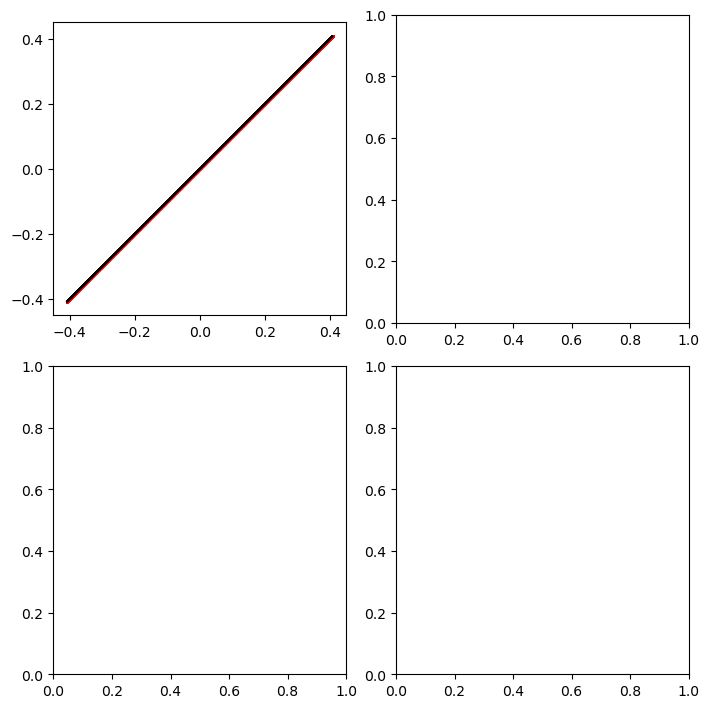

In [18]:
solar_dec, solar_altitude, sza, solar_azimuth_ini = solar_geo_calc(doy, hour, tz_offset, lat, lon)

solar_dec_true = test_solar_geo_calc_df['solar_dec'].values
solar_altitude_true = test_solar_geo_calc_df['solar_altitude'].values
sza_true = test_solar_geo_calc_df['SZA'].values
solar_azimuth_ini_true = test_solar_geo_calc_df['solar_azimuth2'].values

rmse_solar_dec = mean_squared_error(solar_dec_true,solar_dec, squared=False)

fig, ax = plt.subplots(2,2, figsize=(7,7))
ax = ax.flatten()
ax[0].plot(solar_dec_true,solar_dec_true,'-k')
ax[0].scatter(solar_dec_true,solar_dec, c = 'red', alpha=.1, s=1)
ax[0].set_aspect('equal')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [19]:
rmse_solar_dec

2.6307408432687047e-16